In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system

In [2]:
def parseTxtChargeScan(file):
    channel = []
    tot_m = []
    tot_s = []
    
    num_points = 0
    points = []

    with open(file, 'rt') as myfile:
        lines = myfile.readlines()
    
        for i in range(0, len(lines)): 

            if("x points") in lines[i]:
                
                num_points = int(lines[i].split()[2])
                for j in range(1,num_points+1):
                    points.append(float(lines[i+j].split()[0]))
              
                
            if("eff_data") in lines[i]:
                channel.append(int(lines[i].split()[1]))
            
                medie = []
                sigmas = []
                for j in range(1,num_points+1):
                    if(lines[i+j].split()[5] == "NaN" or lines[i+j].split()[6] == "NaN"):
                        medie.append(np.NAN)
                        sigmas.append(np.NAN)
                    else:
                        medie.append(float(lines[i+j].split()[5]))
                        sigmas.append(float(lines[i+j].split()[6]))

                tot_m.append(medie)    
                tot_s.append(sigmas)
    return pd.DataFrame(list(zip(channel, tot_m, tot_s)), columns = ["Channel", "tot_m", "tot_s"]), points 
    

In [3]:
def filterAB(dataframe):
    dataA = dataframe.loc[(dataframe['Channel'] >= 1) & (dataframe['Channel']<=127)] 
    dataB = dataframe.loc[(dataframe['Channel'] >= 128) & (dataframe['Channel']<=239)]
    return dataA, dataB

In [4]:
def calcolaMedie(data):
    tot = data['tot_m'].values.tolist()
    
    D = pd.DataFrame(tot)

    means = []
    for i in range(0, len(D.columns)):
        colonna = D.iloc[:,i].tolist()
        totale_nan_per_colonna = D.iloc[:,i].isna().sum() 
        if(totale_nan_per_colonna>= len(D)/2):
            means.append(np.nan)
        else:
            means.append(round(np.nanmean(colonna),3))
    return means
    

In [5]:
def plotToT(x, dataA, dataB, soglia):
    fig, ax = plt.subplots(figsize = (14, 8))
    fig.suptitle("Time-over-threshold medio, soglia "+ soglia + " elettroni")
    
    tot_medio_A = calcolaMedie(dataA)
    tot_medio_B = calcolaMedie(dataB)
    
    ax.plot(x, tot_medio_A , color = "blue")
    ax.plot(x, tot_medio_B, color = "red")
    
    a = np.arange(0,45+1,10).tolist()
    b = np.arange(60, int(max(points))+20, 20).tolist()
    
    for x in b:
        a.append(x)
    
    ax.set_xticks(a)
    
    ax.set_xlabel("Delta CalHI (mV)")
    ax.set_ylabel("Time-over-threshold (ns)")

    plt.show()    

    

# ToT soglia 1500 elettroni CD=100fF

In [6]:
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_100_LDAC_14_soglia_1500.txt


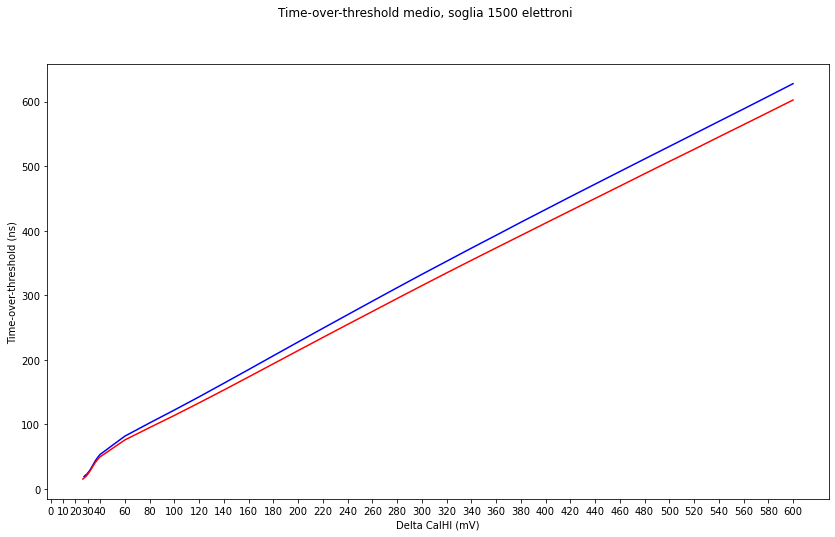

In [7]:
data, points = parseTxtChargeScan(button.files[0])
dataA, dataB = filterAB(data)
plotToT(points, dataA, dataB, "1500")

# ToT soglia 1200 elettroni CD=100fF

In [8]:
button1200 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_100_LDAC_14_soglia_1200.txt


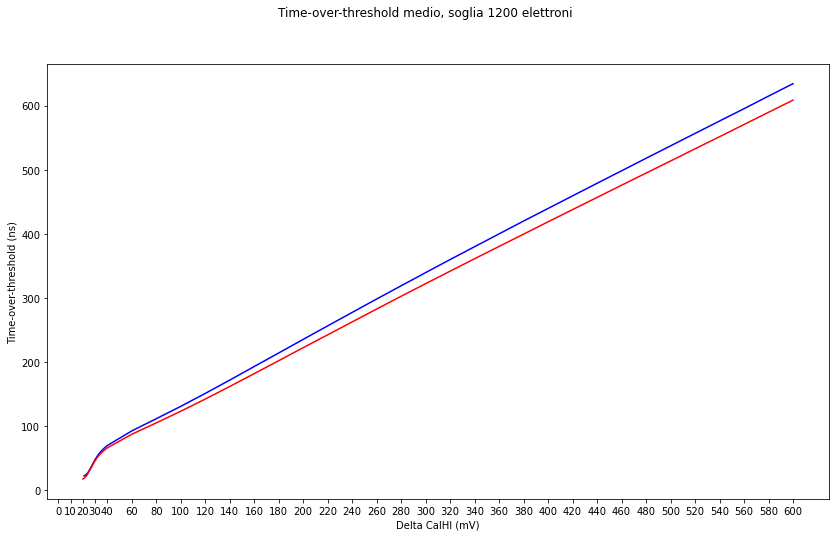

In [9]:
data12, points12 = parseTxtChargeScan(button1200.files[0])
dataA12, dataB12 = filterAB(data12)
plotToT(points12, dataA12, dataB12, "1200")

# ToT soglia 1000 elettroni CD=50fF

In [11]:
button1000 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test time walk e ToT/ChargeScan_PREAMP_30_CD_50_LDAC_14_soglia_1000.txt


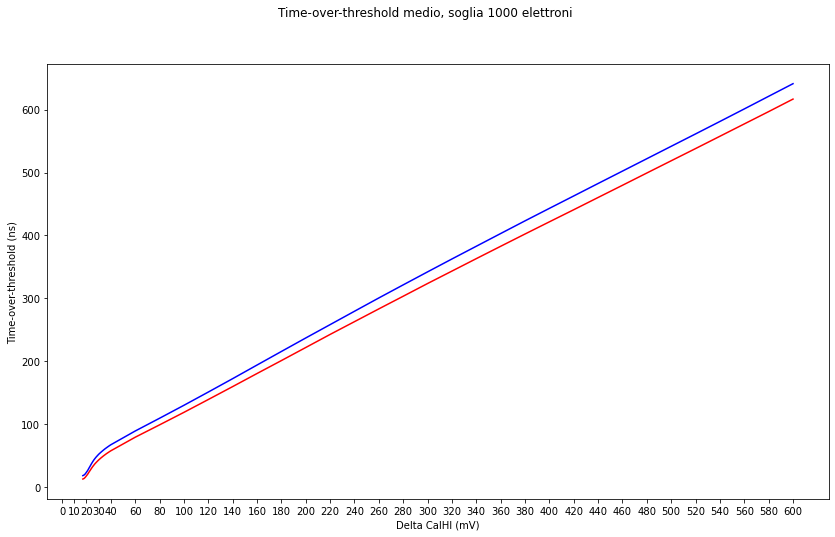

In [12]:
data10, points10 = parseTxtChargeScan(button1000.files[0])
dataA10, dataB10 = filterAB(data10)
plotToT(points10, dataA10, dataB10, "1000")

# ToT IN TIME THRESHOLD 1200 elettroni CD=100fF

In [18]:
buttonIN = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/INTIME/ChargeScan_INTIMETH_1200_PREAMP_30_CD_100_LDAC_14.txt


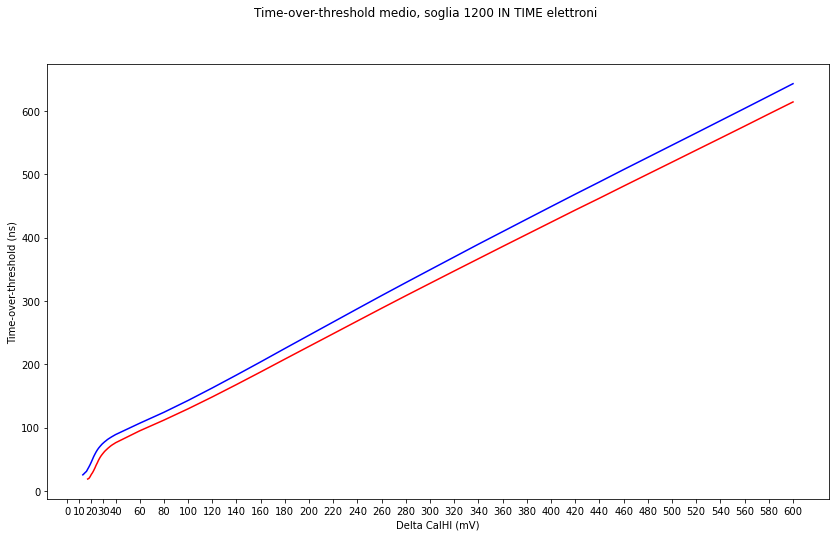

In [19]:
dataIN, pointsIN = parseTxtChargeScan(buttonIN.files[0])
dataAIN, dataBIN = filterAB(dataIN)
plotToT(pointsIN, dataAIN, dataBIN, "1200 IN TIME")